<a href="https://colab.research.google.com/github/monikabattula/Linear_regression/blob/master/Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [12]:
df = pd.read_csv('/content/advertising.csv')

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.shape

(200, 4)

In [15]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<ipython-input-17-87032c1a53f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

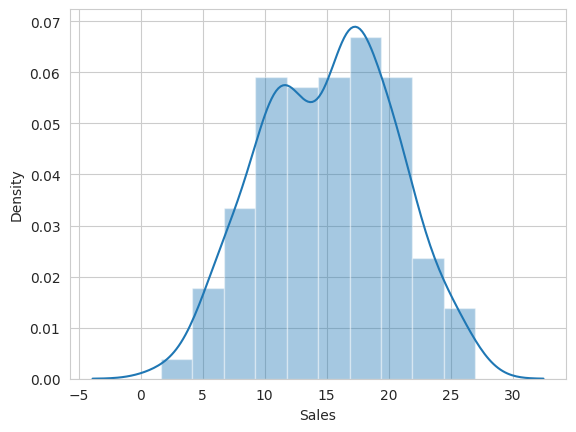

In [17]:
sns.distplot(df['Sales'])

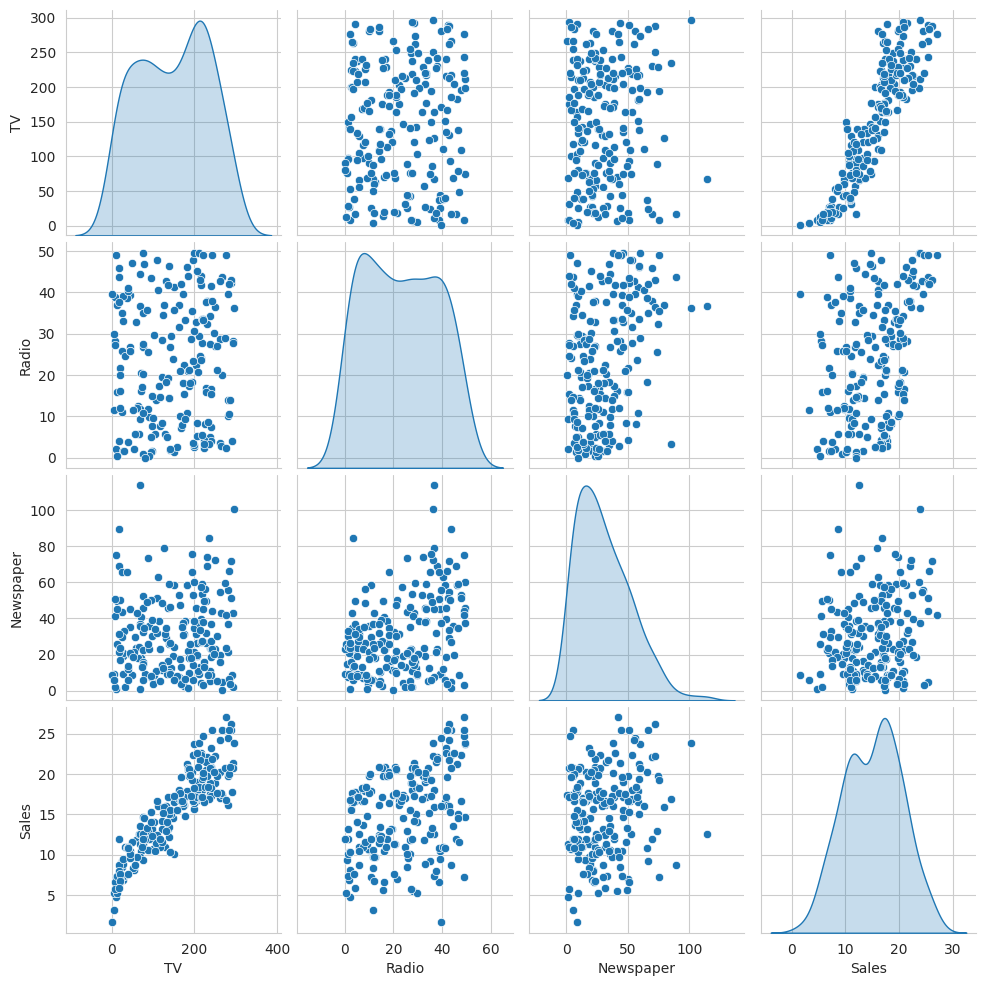

In [18]:
sns.pairplot(df , diag_kind='kde')

In [19]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [20]:
X = df.drop('Sales', axis=1)
y=df['Sales']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model= LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
pd.DataFrame(model.coef_ , X.columns , columns=['Coefiecent'])

,Coefiecent
TV,0.054930
Radio,0.109558
Newspaper,-0.006194


In [27]:
y_pred=model.predict(X_test)

In [28]:
from sklearn import metrics

In [29]:
MAE= metrics.mean_absolute_error(y_test , y_pred)
MSE= metrics.mean_squared_error(y_test , y_pred)
RMSE= np.sqrt(MSE)
pd.DataFrame([MAE , MSE , RMSE] , index=['MAE', 'MSE' , 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.373120
MSE,2.868571
RMSE,1.693686


In [30]:
df['Sales'].mean()

15.130500000000001